In [1]:
import numpy as np
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

# Linear Regression-2 (Melanie Svab)

## Probabilistic perspective on linear regression

The optimal parameters of a linear regression model can be estimated in three ways: algebraic or geometric using a least squares procedure or by a maximum likelihood estimation procedure.

We want to find the model which minimizes the sum of squared errors. The reason why we use squared errors instead of absolute value of error is explained by the probabilistic perspective.

We make two assumptions in linear regression:
* The observed value of $y$ for given variables $x_1, \ldots, x_n$ (columns of $X$) is the predicted value and noise/error: 

 $$
 
\vy = \mathbf{w}^T \mathbf{X} + \epsilon
 $$
 
 The error term equals the residuals, or the observed value of  $y$ substracted by the predicted value. 

* The error $\epsilon$ is independently and identically distributed (iid). It has a normal (i.e. gaussian) distribution with mean zero and variance $\sigma^2$: 

$$
\epsilon \sim \mathcal{N}(0, \sigma^2)
$$

With these two assumption we get:

$$
    p(y \mid \mathbf{x};  \mathbf{\theta}) = \mathcal{N}(y \mid  \mathbf{w}^T \mathbf{x}, \sigma^2)
$$

This is the probability of the observed value of $y$ given $x,\theta$, which equals the the normal (i.e. gaussian) distribution with $y$ given the first assumption and variance $\sigma^2$.

Hence, we expect our drawn data to be distributed around the linear model in a gaussian manner. 
We can see this pattern in this visual representation taken from the lecture slides s03b:

Text(0.5, 1.0, 'Histogram of $\\mathcal{D}$')

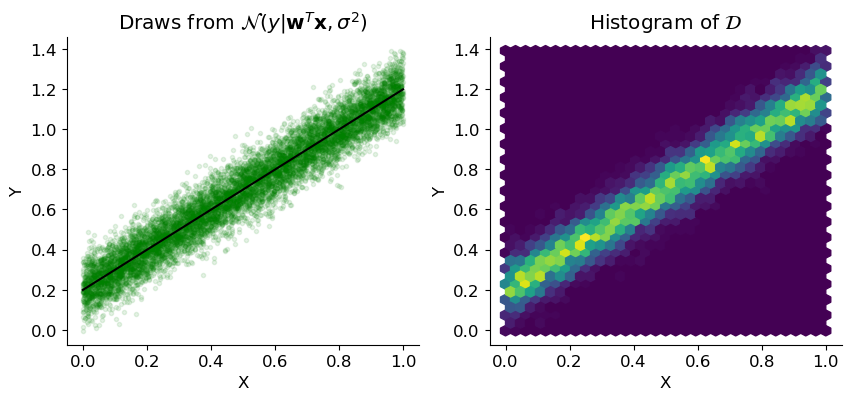

In [2]:
from sklearn.linear_model import LinearRegression

n = 10000
a = 1.0
b = 0.2
sig = 0.08
deg = n - 1

x = np.random.rand(n, 1)
x = np.sort(x, axis=0)
y = a*x + b + sig*np.random.randn(n, 1)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(x, y, color='g', marker='.', alpha=0.1)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Draws from $\mathcal{N}(y | \mathbf{w}^T \mathbf{x}, \sigma^2)$')
     

reg = LinearRegression().fit(x, y)
x_grid = np.linspace(0, 1, 200).reshape(-1, 1)

line, = axs[0].plot([],[], 'k')
line.set_xdata(x_grid)
line.set_ydata(reg.predict(x_grid))

axs[1].hexbin(x.flatten(), y.flatten(), gridsize=32)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Histogram of $\mathcal{D}$')

We see that the values are increasing in density closer to our linear model.

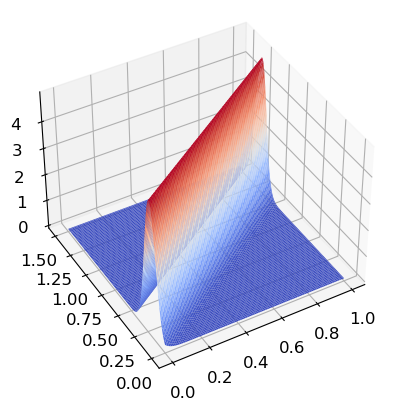

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x_ = np.linspace(0, 1.0, 200)
y_ = np.linspace(0, 1.5, 200)
xx, yy = np.meshgrid(x_, y_)
zz = 1 / sig / np.sqrt(2*np.pi) * np.exp(-(a * xx + b - yy)**2 / 2 / sig**2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(40, -120)
ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm,  rcount=100, ccount=100)

We also see this in this 3D model. The closer to the linear model the higher the values on the z-coordinate.

### Maximum likelihood for linear regression

To get the optimal parameters we want to maximize the likelihood. This is known as maximum likelihood estimation (MLE).

Our training set $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^n$ consists of independent, identically distributed random draws.
We can thus compute the probability (likelihood) of observing a given training set $p(\mathcal{D}; \theta)$ if we believe that the data is generated by a linear regression model with parameters $\theta = (\mathbf{w}, \sigma)$. 

We now want to estimate 𝜃 such that it maximizes the likelihood of observing our training set $D$. As we assume our training samples to be independent, we can multiply the different probabilities of each sample: 

**_NOTE:_**  If A and B are two independent events, then $P(A \cap B) = P(A) * P(B)$

This results in the following formula to maximize the likelihood:

$$
    \hat{\theta} = \arg\max_{\theta} p(\mathcal{D} ; \theta) = \arg\max_\theta \prod_{i = 1}^n p(y_i | \mathbf{x}_i; \theta)
$$
Since the log-likelihood and the likelihood function have the same increasing trend, maximizing the log-likelihood function is equivalent to minimizing the sum of squares error function, if the likelihood function is a normal distribution.

We can now use the product rule for logarithm, which states that the logarithm of a product is equal to the sum of logarithms, to remove the product.

$$
    \ell(\theta) := \log p(\mathcal{D}; \theta) = \sum_{i = 1}^n \log p(y_i | \mathbf{x}_i ; \theta)
$$

It is more established to minimize the negative log-likelihood (NLL), as in statistical packages optimizers usually work by minimizing the result of a function. 

$$
\mathrm{NLL}(\theta) := - \ell(\theta) = -  \sum_{i = 1}^n \log p(y_i | \mathbf{x}_i ; \theta)
$$

### Applying this to our model

We can now insert the normal distribution formula into our formula: 

$$
	p_{\mu,\sigma}(x)=\frac{1}{\sigma \sqrt{2 \pi}} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2}\right) 
$$

Resulting in the following log-likelihood function:

$$
\ell(\theta) = \sum_{i = 1}^n \log \left[ \frac{1}{\sigma \sqrt{2 \pi}} \exp \left( -\frac{1}{2\sigma^2}(y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right) \right]
$$

Using the properties of logarithms, we can simplify the above expression:

$$
\begin{aligned}
\ell(\theta)
&= \sum_{i = 1}^n \log \left[ \frac{1}{\sigma \sqrt{2 \pi}} \right] + \sum_{i = 1}^n \log \left[ \exp \left( -\frac{1}{2\sigma^2}(y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right) \right] \\
&= -\frac{n}{2} \log(2 \pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i = 1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \\
&= - \frac{1}{2 \sigma^2}\underbrace{\sum_{i = 1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2}_{\text{residual sum of squares}~\mathrm{RSS}(\mathbf{w})} - \frac{n}{2}
\log(2\pi\sigma^2)
\end{aligned}
$$

Note that since our underlying functional model is $y = \mathbf{w}^T \mathbf{X} + \epsilon$, we have the Residual Sum of Squares (deviations from the predicted values to the actual empirical values of the data): $\mathrm{RSS}(\mathbf{w}) = \| \boldsymbol{\epsilon} \|^2 = \sum_{i = 1}^n \epsilon_i^2$

From this formula we can again solve the partial derivative with respect to its parameters. 

$$
\begin{aligned}
\frac{1}{2 \sigma^2} \sum_{i = 1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2 - \frac{n}{2} \log(2\pi\sigma^2)
&= - \frac{1}{2 \sigma^2} \sum_{i = 1}^n (y_i - \mathbf{w}^T \mathbf{x}_i)^2 - \frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) \\
&= \frac{1}{2} \left( \frac{1}{\sigma^2} \sum_{i = 1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2 + \frac{n}{\sigma^2} \log(2\pi\sigma^2) \right)
\end{aligned}
$$

We can remove the constant on the right side and we get the maximum likelihood estimator which is minimizing the negative log-likelihood. 

$$
    \mathbf{w}^\star 
    = \arg\min_{\mathbf{w}} \frac{1}{2} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2
    = \arg\min_{\mathbf{w}} \frac{1}{2} \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2
$$

The smaller the value for the negative log likelihood, the higher the probability of observing the dataset that was given to the model and with it the higher the accuracy of the model. This equation equals the loss function in linear regression we saw in lecture s02b. Minimizing the sum of squared errors is the same as maximizing the probability of the dataset, so the negative log-likelihood function can be used to derivate the least squares solution in linear regression. 

The optimal value of $\mathbf{w}$ for both cases can be found by setting the gradient of the respective objective function to zero and solving for $\mathbf{w}$.

We begin with the first equation: 

$$\begin{aligned}
\arg\min_{\mathbf{w}} \frac{1}{2} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2
\end{aligned}$$

We take the gradient with respect to w and set it to zero:

$$\begin{aligned}
\nabla_{\mathbf{w}} \left[\frac{1}{2} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2\right]
&= \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w}) (-\mathbf{x}_i) = \mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) = \mathbf{0} 
\end{aligned}$$

$$\begin{aligned}
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}
\end{aligned}$$

Solving for $\mathbf{w}$, we get:

$$\begin{aligned}
\mathbf{w}^\star = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{aligned}$$

The same with the second equation:

$$\begin{aligned}
\arg\min_{\mathbf{w}} \frac{1}{2} | \mathbf{y} - \mathbf{X} \mathbf{w} |^2
\end{aligned}$$

We again take the gradient with respect to w and set it to zero:

$$\begin{aligned}
\nabla_{\mathbf{w}} \left[\frac{1}{2} | \mathbf{y} - \mathbf{X} \mathbf{w} |^2\right] 
&= -\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) = \mathbf{0} 
\end{aligned}$$

$$\begin{aligned}
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}
\end{aligned}$$

Solving for $\mathbf{w}$, we get:

$$\begin{aligned}
\mathbf{w}^\star = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{aligned}$$

We can see that both cases lead to the same optimal value for $\mathbf{w}$ which is $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.

## Nonlinear Extension

Let us look at the following linear regression plot from the lecture slides s03b:

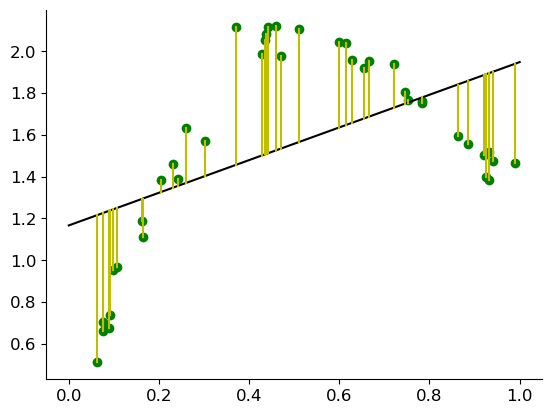

In [4]:
from sklearn.linear_model import LinearRegression

n = 40
a = 4.0
b = 0.2
sig = 0.08
deg = n - 1

x = np.sort(np.random.rand(n, 1), axis=0)
x_grid = np.linspace(0, 1, 200).reshape(-1, 1)
y = np.sin(a*x) + a/2*x + b + sig*np.random.randn(n, 1)

reg = LinearRegression().fit(x, y)
y_hat = reg.predict(x)

fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, color='g')
line, = ax.plot(x_grid, reg.predict(x_grid), 'k')
for i in range(n):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'y')

The line does not really fit the data and a linear model seems to be not the best choice to model the data. The residual shows a definite curvature, indicating that the best model may be non-linear.
 
Up to this point we have been limited to modeling / approximating data by lines, planes, and higher-dimensional linear subspaces.
But we can use linear regression to fit non-linear models with adding only a nonlinear feature to transform to data:

$$
\hat{y} = \mathbf{w}^T \phi(\mathbf{x})
$$

An example for d=2 could look like this: 

$$
    \phi(\mathbf{x}) = \phi\left(\binom{x_1}{x_2}\right) = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1 x_2 \\ x_1^2 \\ x_2^2 \end{bmatrix}
$$

Let us revisit the code from before. We add a new $\phi$ function, which we now use to transform our $x$ to fit the curvature.

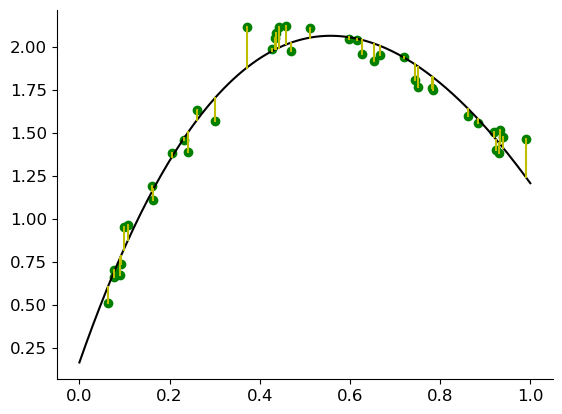

In [5]:
def phi(x):
    return np.hstack((x, np.exp(-x)))

reg = LinearRegression().fit(phi(x), y)
y_hat = reg.predict(phi(x))

fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, color='g')
line, = ax.plot(x_grid, reg.predict(phi(x_grid)), 'k')

for i in range(n):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'y')

## A crazy idea? Random features?
```{figure} ./images/kitchensinks.jpg
Sometimes we can use randomization to our advantage.
```

## Back to linear regression for classification

[-1.5, 1.5, -1.5, 1.5]

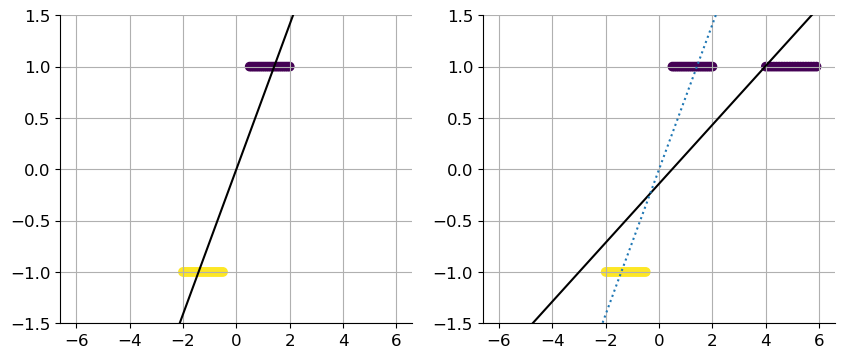

In [6]:
x1 = np.concatenate((np.linspace(-2, -0.5, 20), 
                    np.linspace(0.5, 2, 20))).reshape(-1, 1)

x2 = np.concatenate((np.linspace(-2, -0.5, 20), 
                    np.linspace(0.5, 2, 20),
                    np.linspace(4, 5.9, 20))).reshape(-1, 1)

y1, y2 = np.sign(x1), np.sign(x2)
reg1 = LinearRegression().fit(x1, y1)
reg2 = LinearRegression().fit(x2, y2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(x1, y1, c=-y1)
axs[1].scatter(x2, y2, c=-y2)

x_grid = np.linspace(-6, 6, 200).reshape(-1, 1)
line1, = axs[0].plot(x_grid, reg1.predict(x_grid), 'k')
line2, = axs[1].plot(x_grid, reg2.predict(x_grid), 'k')
line2b, = axs[1].plot(x_grid, reg1.predict(x_grid), ':')
axs[0].grid(True)
axs[1].grid(True)
plt.setp(axs, ylim=(-1.5, 1.5))

Here we have an example of a model which does not really fit the given data. We clearly see it with additional values, that a linear regression is not the best model to choose here. In this case, a logistic regression for classification would fit the data more.